In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      label (string) - tag for the line
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [3]:
import pandas as pd

In [9]:
data=pd.read_csv('D:\DeTaiNam2024\SoLieu\KinhTeViMo\CPI.csv')

In [8]:
data.head()

,tg,t,cpi
0,0,Jan-95,103.8
1,1,Feb-95,103.4
2,2,Mar-95,100.2
3,3,Apr-95,101.0
4,4,May-95,101.8


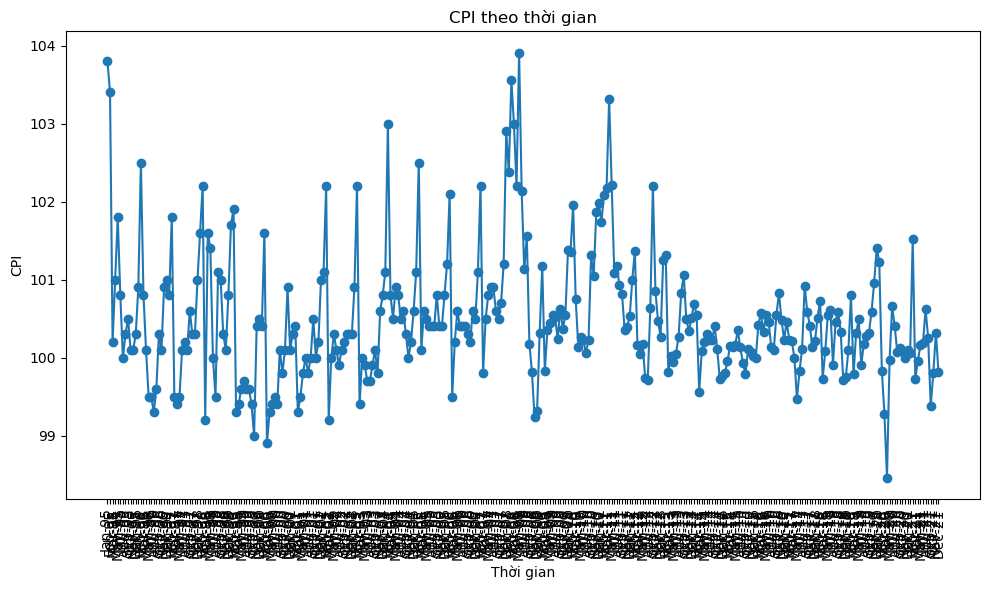

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists
time_step = []
cpi = []

# Open CSV file
with open('D:\DeTaiNam2024\SoLieu\KinhTeViMo\CPI.csv', 'r') as csvfile:
    # Initialize reader
    reader = csv.reader(csvfile)

    # Skip the first line
    next(reader)

    # Append values to lists
    for row in reader:
        time_step.append(row[1])  # Thời gian (ví dụ: "Jan-95")
        cpi.append(float(row[2]))  # CPI

# Convert lists to numpy arrays (cho cột CPI)
series = np.array(cpi)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time_step, series, marker='o', linestyle='-')
plt.xlabel('Thời gian')
plt.ylabel('CPI')
plt.title('CPI theo thời gian')
plt.xticks(rotation=90)  # Xoay nhãn trục x cho dễ đọc
plt.tight_layout()
plt.show()


In [14]:
# Define the split time
split_time = int( 0.85*len(series))

# Get the train set
time_train = time_step[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time_step[split_time:]
x_valid = series[split_time:]

In [15]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [23]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [24]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
8/8 [==============================] - 1s 9ms/step - loss: 48.5621 - lr: 1.0000e-08
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 48.5146 - lr: 1.1220e-08
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 48.4385 - lr: 1.2589e-08
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 48.3434 - lr: 1.4125e-08
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 48.2323 - lr: 1.5849e-08
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 48.1058 - lr: 1.7783e-08
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 47.9629 - lr: 1.9953e-08
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 47.8021 - lr: 2.2387e-08
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 47.6214 - lr: 2.5119e-08
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 47.4183 - lr: 2.8184e-08
Epoch 11/100
8/8 [=====================

8/8 [==============================] - 0s 4ms/step - loss: 18.6815 - lr: 1.7783e-04
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 12.0046 - lr: 1.9953e-04
Epoch 88/100
8/8 [==============================] - 0s 4ms/step - loss: 9.9683 - lr: 2.2387e-04
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 24.3925 - lr: 2.5119e-04
Epoch 90/100
8/8 [==============================] - 0s 4ms/step - loss: 22.9517 - lr: 2.8184e-04
Epoch 91/100
8/8 [==============================] - 0s 4ms/step - loss: 18.4748 - lr: 3.1623e-04
Epoch 92/100
8/8 [==============================] - 0s 4ms/step - loss: 21.2041 - lr: 3.5481e-04
Epoch 93/100
8/8 [==============================] - 0s 4ms/step - loss: 32.1211 - lr: 3.9811e-04
Epoch 94/100
8/8 [==============================] - 0s 4ms/step - loss: 32.7824 - lr: 4.4668e-04
Epoch 95/100
8/8 [==============================] - 0s 4ms/step - loss: 34.4926 - lr: 5.0119e-04
Epoch 96/100
8/8 [==========================

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])


(1e-08, 0.001, 0.0, 100.0)

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [20]:
# Set the learning rate
learning_rate = 1e-6

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])

# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 13ms/step - loss: 99.9011 - mse: 10081.0557
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 99.9010 - mse: 10081.0430
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 99.9009 - mse: 10081.0234
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 99.9008 - mse: 10081.0029
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 99.9007 - mse: 10080.9795
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 99.9006 - mse: 10080.9561
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 99.9005 - mse: 10080.9326
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 99.9004 - mse: 10080.9092
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 99.9003 - mse: 10080.8857
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 99.9001 - mse: 10080.8613
Epoch 11/100
8/8 [=========

8/8 [==============================] - 0s 13ms/step - loss: 99.8914 - mse: 10079.1084
Epoch 85/100
8/8 [==============================] - 0s 8ms/step - loss: 99.8913 - mse: 10079.0850
Epoch 86/100
8/8 [==============================] - 0s 8ms/step - loss: 99.8912 - mse: 10079.0605
Epoch 87/100
8/8 [==============================] - 0s 8ms/step - loss: 99.8910 - mse: 10079.0371
Epoch 88/100
8/8 [==============================] - 0s 11ms/step - loss: 99.8909 - mse: 10079.0127
Epoch 89/100
8/8 [==============================] - 0s 9ms/step - loss: 99.8908 - mse: 10078.9893
Epoch 90/100
8/8 [==============================] - 0s 8ms/step - loss: 99.8907 - mse: 10078.9648
Epoch 91/100
8/8 [==============================] - 0s 8ms/step - loss: 99.8906 - mse: 10078.9414
Epoch 92/100
8/8 [==============================] - 0s 8ms/step - loss: 99.8905 - mse: 10078.9180
Epoch 93/100
8/8 [==============================] - 0s 8ms/step - loss: 99.8903 - mse: 10078.8945
Epoch 94/100
8/8 [=============

In [21]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

2/2 [==============================] - 0s 54ms/step


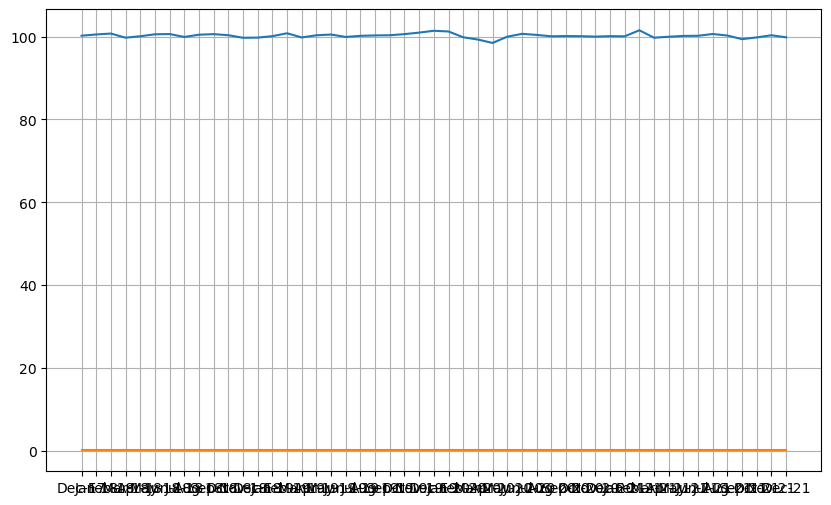

[0.13957855 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855
 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855
 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855
 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855
 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855
 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855
 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855
 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855 0.13957855
 0.13957855]


In [22]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))
print(results)

In [ ]:
import numpy as np

def mean_squared_error(actual, predicted):
    return np.mean((actual - predicted) ** 2)

# Tính MSE
mse = mean_squared_error(x_valid, results)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 148.657044430109
